In [1]:
%matplotlib inline
import numpy as np
from FFNN.feedforward import FeedForward
from neuron.neuron_nn import NeuronNN
from neuron.neuron_kan import NeuronKAN
import matplotlib.pyplot as plt
from utils.activations import tanh_act, relu, sigmoid_act
from utils.edge_fun import get_bsplines

folder_fig = './'

color_plots = {'dataset': 'b',
               'kan': 'orange',
               'mlp': 'green'}

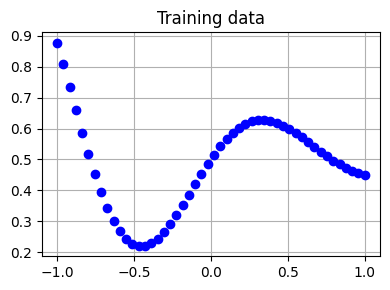

In [2]:
x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
y_train = .5 * np.sin(4 * x_train) * np.exp(-(x_train+1)) + .5  # damped sinusoid

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x_train, y_train, 'o', color=color_plots['dataset'])
ax.set_title('Training data')
ax.grid()
fig.tight_layout()

In [3]:
n_iter_train_1d = 500
loss_tol_1d = .05
seed = 476

In [4]:
kan_1d = FeedForward([1, 2, 2, 1],  # layer size
                  eps=.01,  # gradient descent parameter
                  n_weights_per_edge=7,  # n. edge functions
                  neuron_class=NeuronKAN, 
                  x_bounds=[-1, 1],  # input domain bounds
                  get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                  seed=seed,
                  weights_range=[-1, 1])
kan_1d.train(x_train, 
          y_train, 
          n_iter_max=n_iter_train_1d, 
          loss_tol=loss_tol_1d)

 19%|█▉        | 95/500 [00:07<00:32, 12.46it/s, loss: 0.049. Convergence has been attained!]


In [5]:
mlp_1d = FeedForward([1, 13, 1],  # layer size
                  eps=.005,  # gradient descend parameter
                  activation=relu,  # activation type (ReLU, tanh or sigmoid)
                  neuron_class=NeuronNN, 
                  seed=seed,
                  weights_range=[-.5, .5])
mlp_1d.train(x_train, 
             y_train, 
             n_iter_max=n_iter_train_1d, 
             loss_tol=loss_tol_1d)

 98%|█████████▊| 489/500 [00:13<00:00, 35.07it/s, loss: 0.050. Convergence has been attained!]


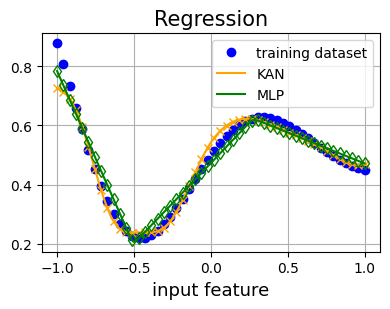

In [6]:
# Regression on training data
fig, ax = plt.subplots(figsize=(4,3.2))
x_plot = np.linspace(x_train[0], x_train[-1], 1000).reshape(-1, 1)
ax.plot(x_train, y_train, 'o', color=color_plots['dataset'], label='training dataset')
ax.plot(x_plot, [kan_1d(x) for x in x_plot], color=color_plots['kan'], label='KAN')
ax.plot(x_train, [kan_1d(x) for x in x_train], 'x', color=color_plots['kan'], fillstyle='none')
ax.plot(x_plot, [mlp_1d(x) for x in x_plot], color=color_plots['mlp'], label='MLP')
ax.plot(x_train, [mlp_1d(x) for x in x_train], 'd', color=color_plots['mlp'], fillstyle='none')
ax.set_xlabel('input feature', fontsize=13)
ax.set_title('Regression', fontsize=15)
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()